# Immigration data analysis
  - rename columns
  - drop columns
  - add columns

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('Canada.xlsx', sheet_name = 1, skiprows= 20, skipfooter=2)
df.head(2)

In [ ]:
# rename columns
cols_to_rename = {
    'OdName' : 'Country',
    'AreaName': 'Continent',
    'RegName' : 'Region',
    'DevName' : 'Status'
}
df = df.rename(columns=cols_to_rename)
df.head(2)

In [ ]:
# drop columns
#check no of unique value is data
print('type unique values:', df.Type.nunique())
print('coverage unique values:', df.Coverage.nunique())

#count unique values in a column
print('Coverage unique values count:', df.Coverage.value_counts())

In [ ]:
cols_to_drop = ['AREA', 'REG', 'DEV', 'Type', 'Coverage']
df= df.drop(columns=cols_to_drop)
df.head()

### not for every data you use set_index()

In [ ]:
df =df.set_index('Country')
df.head()

In [ ]:
# make all columns lowercase (optional)
df.columns = [str(name).lower() for name in df.columns.tolist()]
df.head()

In [ ]:
years = list(map(str, range(1980, 2014)))
print(years)

In [ ]:
df[years].sum(axis=1) #axis 0 for row wise , 1 for column 

In [ ]:
df['total'] = df[years].sum(axis = 1)
df.head()

<Axes: >

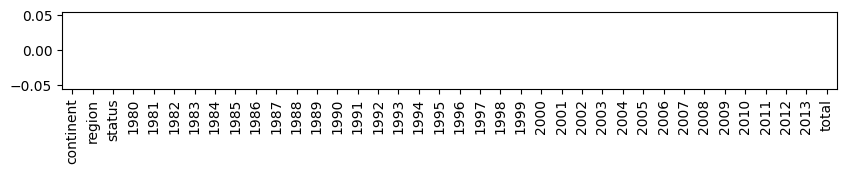

In [30]:
df.isnull().sum().plot(figsize = (10, 1), kind = 'bar')

### `no null values detected`

### `total immigration visualisation`

<Axes: title={'center': 'Total immigration'}, xlabel='Country'>

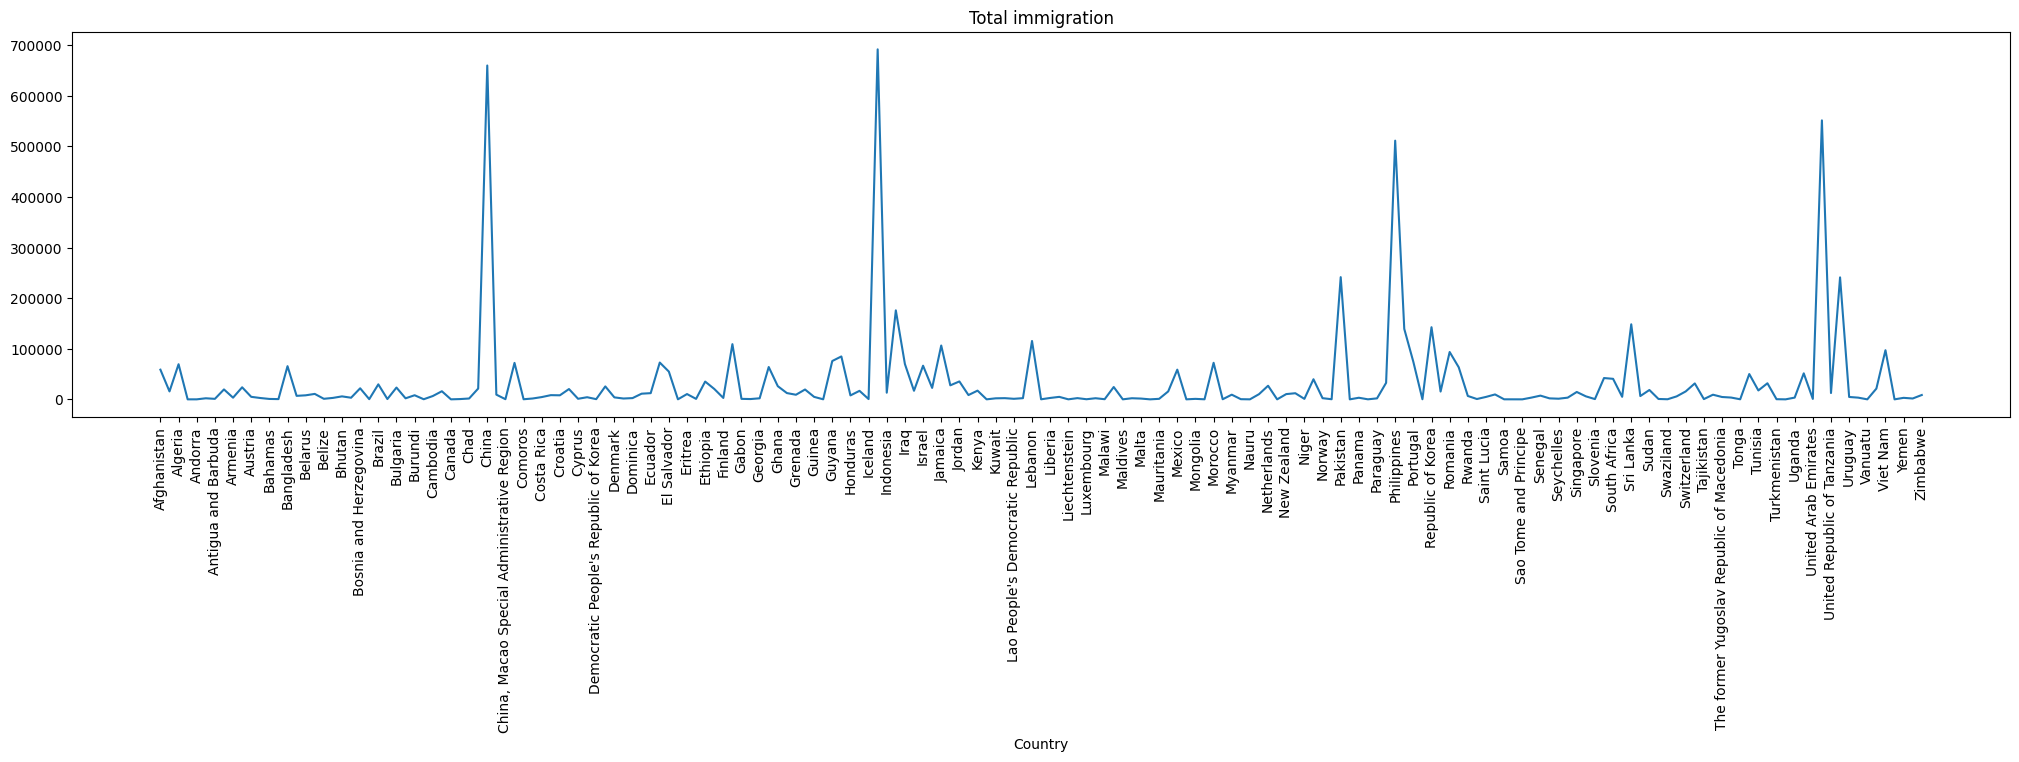

In [38]:
df.total.plot(rot = 90, 
              figsize = (25, 5),
              xticks = range(0, df.shape[0], 2),
              title = 'Total immigration'
              )

Text(0, 0.5, 'Immigration')

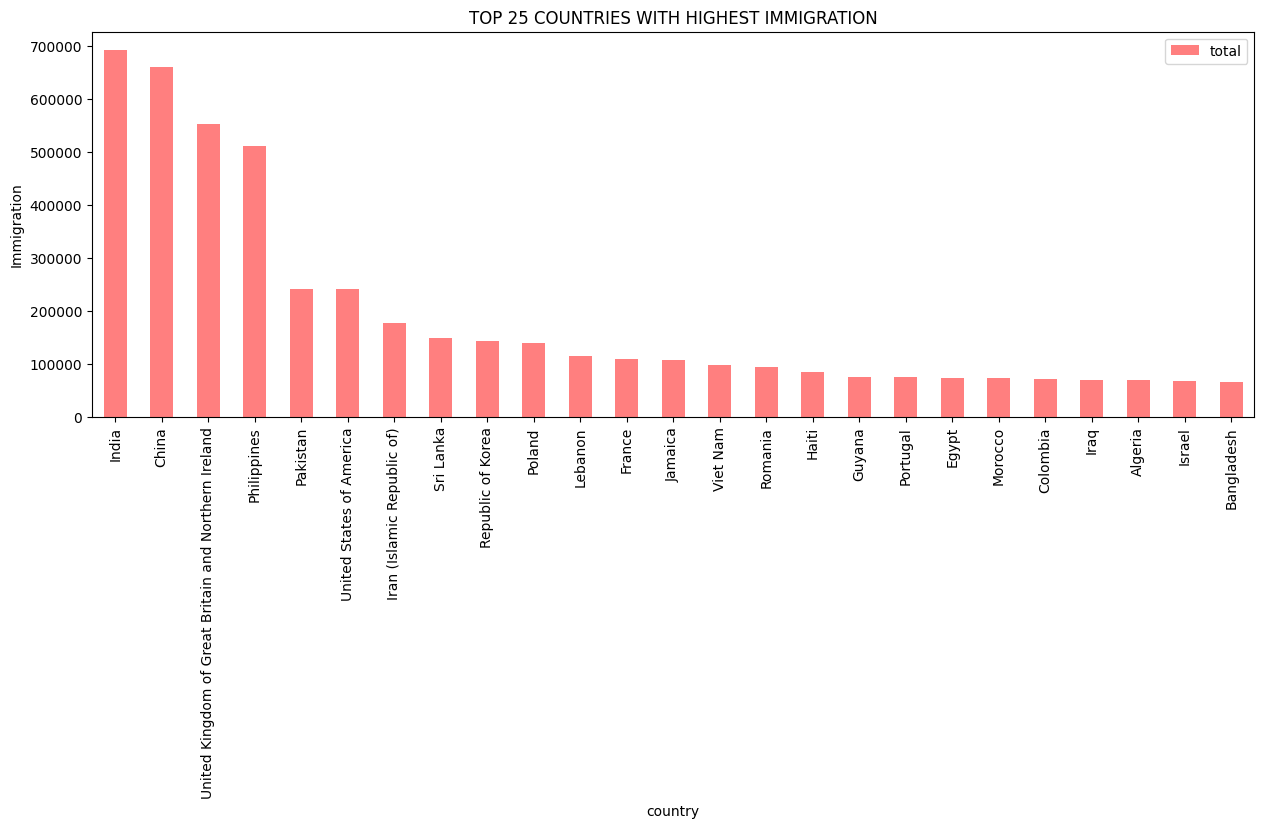

In [45]:
# top 25 countries with highest immigration
ax = df.sort_values('total', ascending = False).head(25).plot(
    kind= 'bar',
    y = 'total',
    title = 'TOP 25 COUNTRIES WITH HIGHEST IMMIGRATION',
    figsize= (15,5),
    color = 'red',
    alpha = .5)
ax.set_xlabel('country')
ax.set_ylabel('Immigration')